# Menace

Welcome to the Menace Jupyter Notebook interface! This notebook contains examples of how to run the pipeline on a dataset, load the resulting output dataframes and perform analysis and visualisation using seaborn.  **If you are using Menace as part of any published scientific work, please cite  "".**

In [63]:
import menace

In [64]:
import sys
sys.version

'2.7.12 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:43:17) \n[GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]'

In [65]:
import menace.lib.Community

In [66]:
from menace.__main__ import *

In [67]:
#config = menace.get_config()
args = get_parser().parse_args(['full'])
config = read_config(args)
config = compile_config(args,config)

## Load Abundance and Relative C periods

In [68]:
#data = menace.load_data()

In [69]:
import pandas as pd
import numpy as np
from os.path import join

In [70]:
ptr = pd.DataFrame.from_csv(join(config['output_path'],"Collect","PTR.csv"),  sep=';',index_col=-1)
ab = pd.DataFrame.from_csv(join(config['output_path'],"Collect","Abundance.csv"),  sep=';')
ab = ab.ix[:,np.argsort(ab.columns)]
ptr = ptr.ix[:,np.argsort(ptr.columns)]
#ab_ptr = pd.DataFrame.from_csv(join(config['output_path'],"Collect","AbundancePTR.csv"),  sep=';')

In [71]:
ab.columns

Index([u'ERR525715', u'ERR525719', u'ERR525724', u'ERR525728', u'ERR525732',
       u'ERR525736', u'ERR525740', u'ERR525745', u'ERR525749', u'ERR525752',
       u'ERR525756', u'ERR525758', u'ERR525762', u'ERR525766', u'ERR525770',
       u'ERR525774', u'ERR525778'],
      dtype='object')

In [72]:
ptr.columns

Index([u'25715/npy', u'25719/npy', u'25724/npy', u'25728/npy', u'25732/npy',
       u'25736/npy', u'25740/npy', u'25745/npy', u'25749/npy', u'25752/npy',
       u'25756/npy', u'25758/npy', u'25762/npy', u'25766/npy', u'25770/npy',
       u'25774/npy', u'25778/npy'],
      dtype='object')

In [73]:
ptr.columns=list(ab.columns)

In [74]:
#ptr=ptr.reindex_axis(sorted(ptr.columns), axis=1)
#ab=ab.reindex_axis(sorted(ab.columns), axis=1)

In [75]:
s=ab.transpose().mean().sort_values(ascending=False).index.values
ab2=ab.ix[list(s),:]
ptr2=ptr.ix[list(s),:]

In [76]:
data=ab2.fillna(0).as_matrix()
data2=ptr2.fillna(1).as_matrix()

## Visualization

In [77]:
%matplotlib inline
import seaborn as sns
import numpy
import matplotlib.pyplot as plt
sns.set_context("paper")
#sns.set(style="default")

In [78]:
pwd

u'/Users/hedani/Documents/Projects/fromH'

In [79]:
# kind of r export
#ptr.to_csv('out.csv',index=False)
#ab.to_csv('ab_corr.csv',index=False)

#ptr.ix[:,:20].to_csv('out.csv',index=False)
#ab.ix[:,:20].to_csv('ab_corr.csv',index=False)

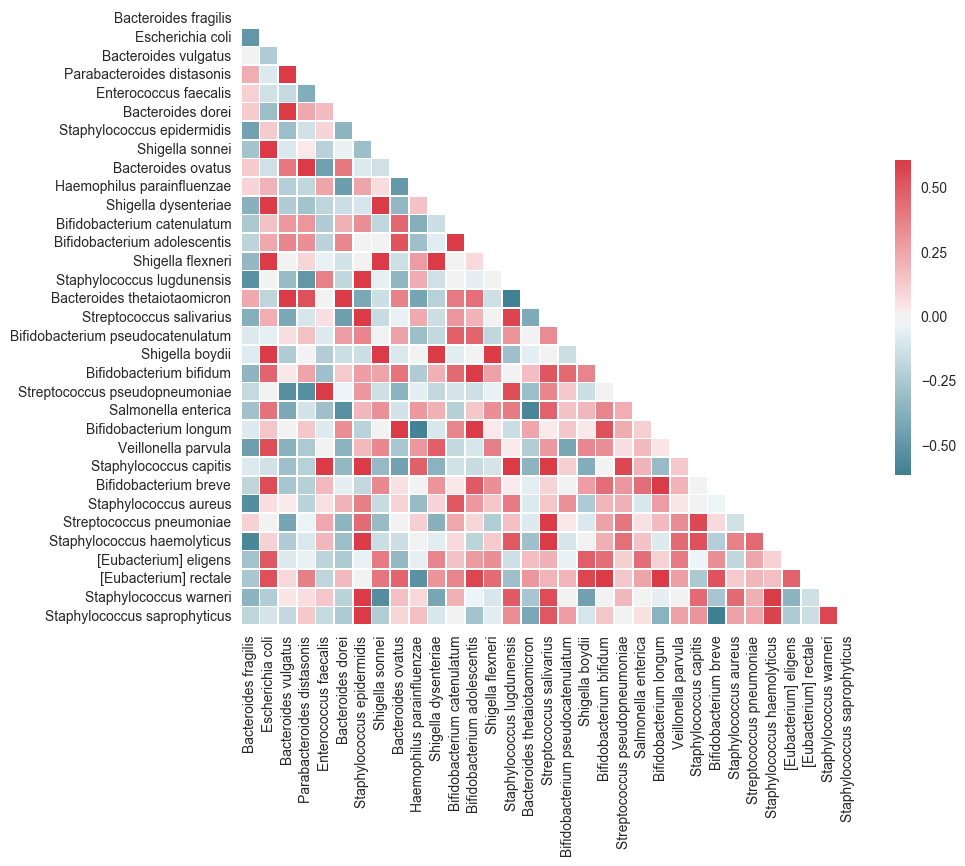

In [80]:
sns.set(style="white")
corr=ab2.transpose().corr('spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

ax.set_xlabel('')
ax.set_ylabel('')

f.subplots_adjust(left=0.2,bottom=0.2)

##fig = ax.get_figure()
f.savefig('Figures/Species_Ab_Correlation.pdf')

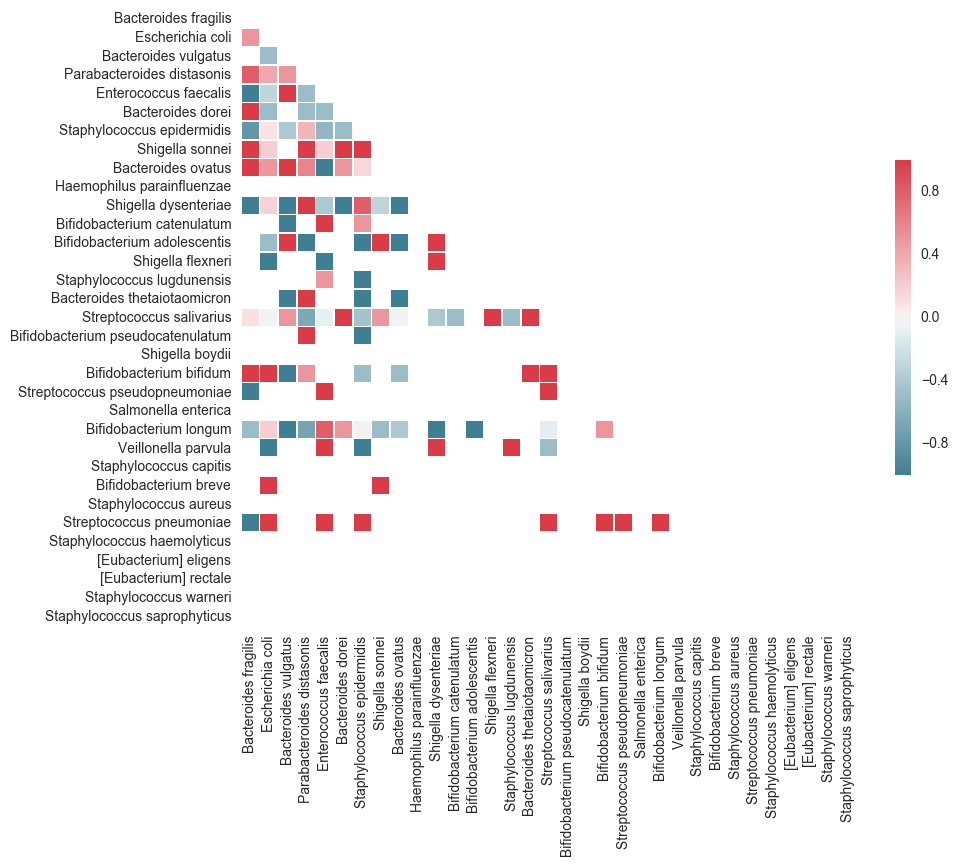

In [19]:
sns.set(style="white")
corr=ptr2.transpose().corr('spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

ax.set_xlabel('')
ax.set_ylabel('')

f.subplots_adjust(left=0.2,bottom=0.2)

f.savefig('Figures/Species_PTR_Correlation.pdf')

In [20]:
from sklearn.preprocessing import normalize

In [21]:
normalize(ab2.ix['Escherichia coli'])

/Users/hedani/miniconda2/envs/menace/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  5.24949699e-01,   8.25013890e-02,   1.23857743e-06,
          5.77428462e-01,   2.36755550e-01,   5.66902731e-02,
          1.39660962e-03,   4.79435154e-01,   3.23459674e-05,
          3.06534487e-04,   7.12326834e-07,   1.32330071e-02,
          3.77277842e-05,   3.20065762e-06,   1.86339365e-01,
          2.45302145e-01,   1.74159268e-06]])

In [81]:
from scipy.stats import spearmanr
corr=spearmanr(data, data, axis=0)

In [82]:
corr.correlation

array([[ 1.        ,  0.57687166,  0.06935823, ...,  0.5434492 ,
         0.64004011,  0.12684883],
       [ 0.57687166,  1.        ,  0.5129084 , ...,  0.71891711,
         0.78342246,  0.54098772],
       [ 0.06935823,  0.5129084 ,  1.        , ...,  0.45091413,
         0.44474895,  0.85052286],
       ..., 
       [ 0.5434492 ,  0.71891711,  0.45091413, ...,  1.        ,
         0.60227273,  0.40628395],
       [ 0.64004011,  0.78342246,  0.44474895, ...,  0.60227273,
         1.        ,  0.47430434],
       [ 0.12684883,  0.54098772,  0.85052286, ...,  0.40628395,
         0.47430434,  1.        ]])

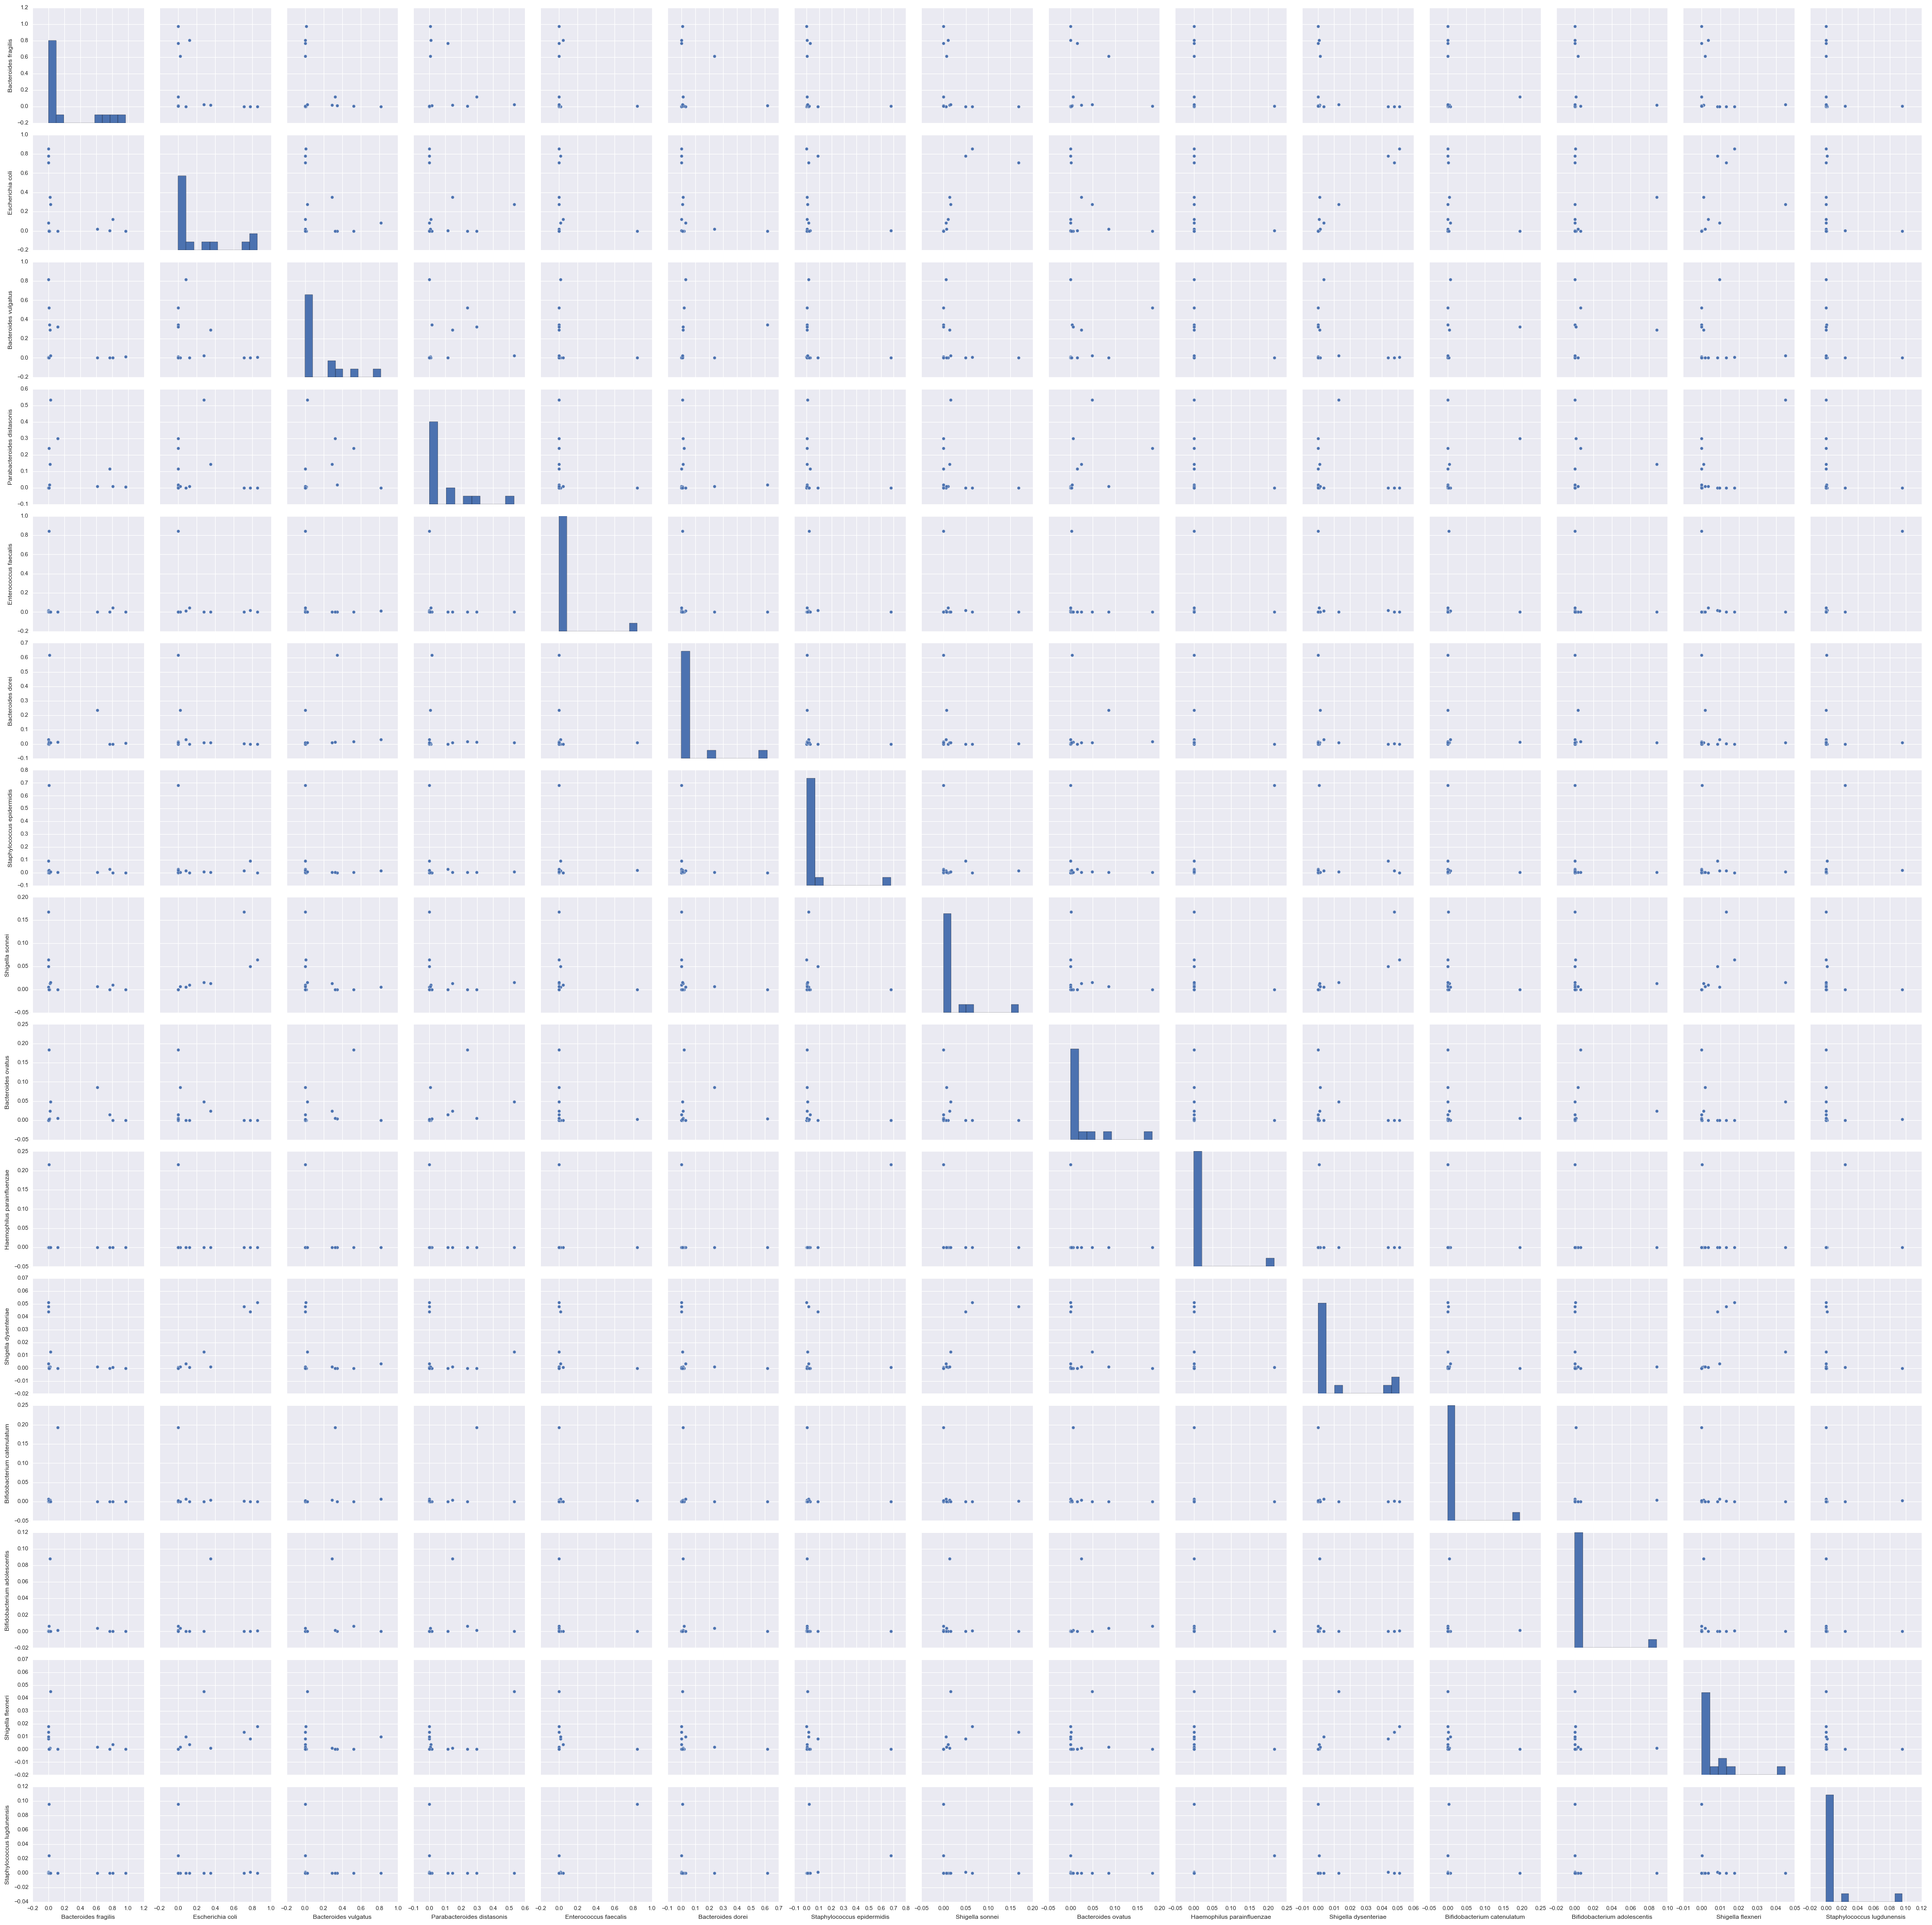

In [28]:
sns.pairplot(ab2.transpose().ix[:15,:15])

NameError: name 'normalize' is not defined

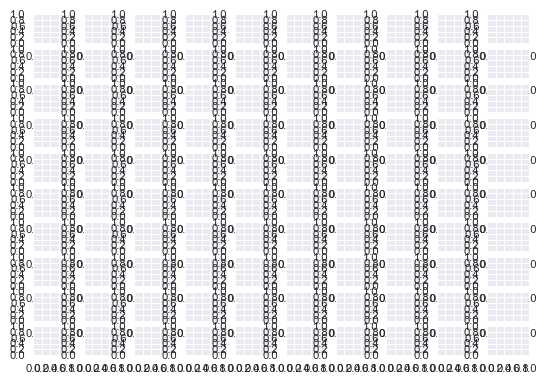

In [32]:
# plot pairwise correlations
fig, axn = plt.subplots(10, 10)
#cbar_ax = fig.add_axes([.91, .3, .03, .4])

#h=[abs2.ix[:n,:],ptrs2.ix[:n,:]]
#h=[abs2,ptrs2]

for i in range(10):
    for j in range(10):
        plt.plot(normalize(data[i,:]),normalize(data[j,:]),'k.',ax=axn[i,j])
        plt.gca().set_aspect('equal', adjustable='box')

In [1]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(ptr2.fillna(1).transpose(), alpha=0.2, figsize=(6, 6), diagonal='none')

NameError: name 'ptr2' is not defined

In [60]:
np.array(ab_data.fillna(0).transpose().var())

array([  1.48869611e-01,   9.05924219e-02,   5.77228283e-02,
         2.20563327e-02,   4.37625447e-02,   2.37955482e-02,
         2.67202077e-02,   1.86482529e-03,   2.25909148e-03,
         2.74613399e-03,   3.43666184e-04,   2.17954245e-03,
         4.88055554e-04,   1.48259159e-04,   5.56117686e-04,
         1.48350753e-04,   2.61349309e-04,   7.18470617e-05,
         5.23394548e-05,   1.42404933e-05,   1.63675622e-05,
         2.15508273e-06,   3.46539042e-07,   9.34285243e-07,
         2.32054249e-07,   4.16421701e-08,   7.13133975e-08,
         8.68616063e-08,   5.62595008e-08,   2.44254346e-08,
         2.18245438e-09,   1.12633177e-08,   3.42821457e-12])

In [61]:
reduced_data = PCA(n_components=1).fit_transform(ab_data.fillna(0).transpose())
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(np.array(ab_data.fillna(0).transpose().var()))

/Users/hedani/miniconda2/envs/menace/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: n_samples=1 should be >= n_clusters=4

In [50]:
# ab boxplots per species
ab_data=abs2.where(ab2>10**(-6))
sns.set(style="darkgrid")
#ax.axvline(1, 0, 2, linewidth=2, c='r')

#order=ab_data.transpose().median().sort_values(ascending=False).index.values
order=ab_data.transpose().var().sort_values(ascending=False).index.values

ax=sns.boxplot(ab_data.transpose(),orient="h",order=order)
ax.set_xlabel('Relative abundance')
ax.set_ylabel('')
ax.set(xscale="log")

fig = ax.get_figure()
fig.subplots_adjust(left=0.3)
fig.savefig('Figures/Species_Ab_boxplot.pdf')

NameError: name 'abs2' is not defined

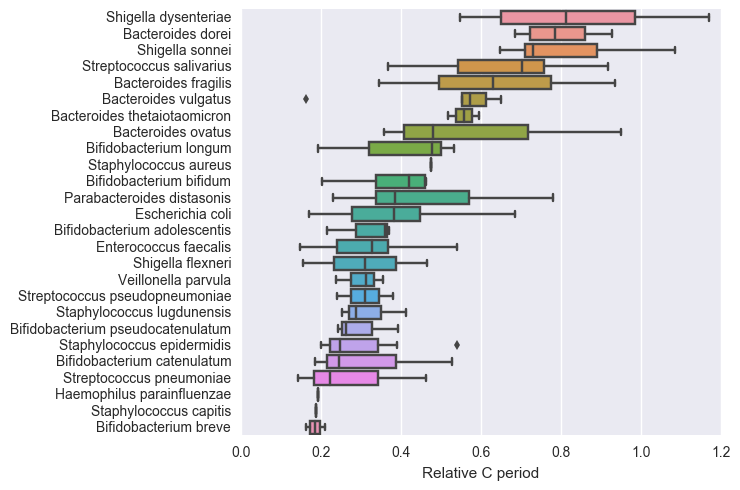

In [259]:
# C periods boxplot per species
sns.set(style="darkgrid")
#ax.axvline(1, 0, 2, linewidth=2, c='r')
ax=sns.boxplot(np.log2(ptr.transpose()),orient="h",order=ptr.transpose().median().sort_values(ascending=False).index.values)
ax.set_xlabel('Relative C period')
ax.set_ylabel('')

fig = ax.get_figure()
fig.subplots_adjust(left=0.3)
fig.savefig('Figures/Species_C_periods_boxplot.pdf', bbox_inches='tight', pad_inches=0)

In [ ]:
# Clustering

In [83]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [84]:
n_digits=3

In [85]:
# perform PCA to reduce dimensionality
pca = PCA(n_components=3)
pca.fit(data.transpose())
PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_) 

[ 0.42668764  0.23060322  0.13216998]


In [86]:
#kmeans = KMeans(n_clusters=4, random_state=0).fit(cl_mat.transpose())
#centroids=kmeans.cluster_centers_

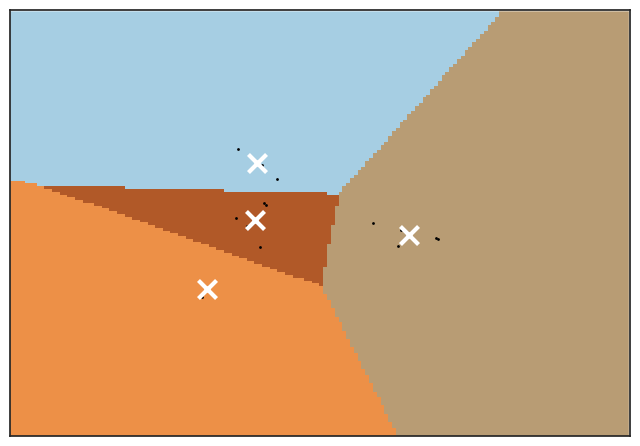

In [118]:
reduced_data = PCA(n_components=2).fit_transform(data.transpose())
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=4)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
#plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
#          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [143]:
cluster_ind=kmeans.fit_predict(reduced_data)
cluster_sort=np.argsort(cluster_ind)
cluster_ind_sort=np.sort(cluster_ind)
line_pos=(np.where(np.diff(cluster_ind_sort)==1)+np.array(1))[0]

In [144]:
line_pos

array([ 3,  8, 13])

In [145]:
cluster_ind

array([0, 1, 1, 0, 2, 3, 2, 0, 3, 1, 3, 1, 3, 2, 2, 2, 1], dtype=int32)

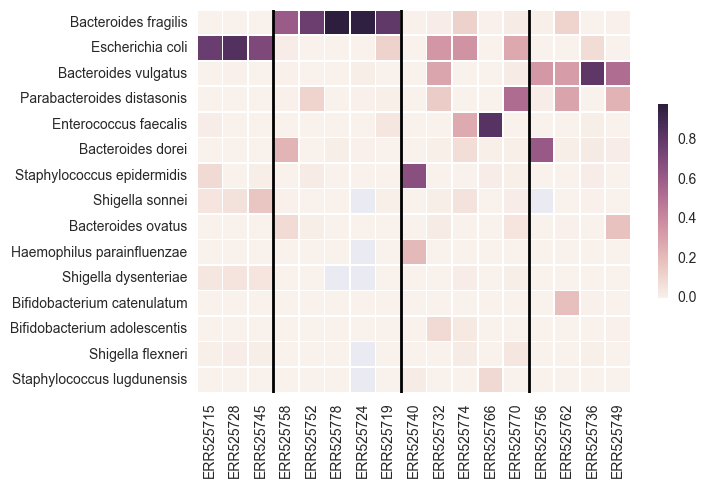

In [146]:
# abundance heatmap
# sort according to kmeans cluster
#s=ab.index.values[list(ind)]
#abs2=ab.reindex(list(s))
abs2=ab2.ix[:,list(cluster_sort)]
ptrs2=ptr2.ix[:,list(cluster_sort)]
#abs2sort=abs2.ix[:, abs2.max().sort_values(ascending=False).index]

f, ax = plt.subplots(figsize=(7, 5))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(abs2.ix[:15],linewidths=.5,square=True,ax=ax, cbar_kws={"shrink": .5})

ax.set_xlabel('')
ax.set_ylabel('')
cluster_ind_sort

for pos in line_pos:
    ax.axvline(pos, 0, 2, linewidth=2, c='k')

In [122]:
abs2.columns==ptrs2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [123]:
ptrs2.index.values==abs2.index.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True], dtype=bool)

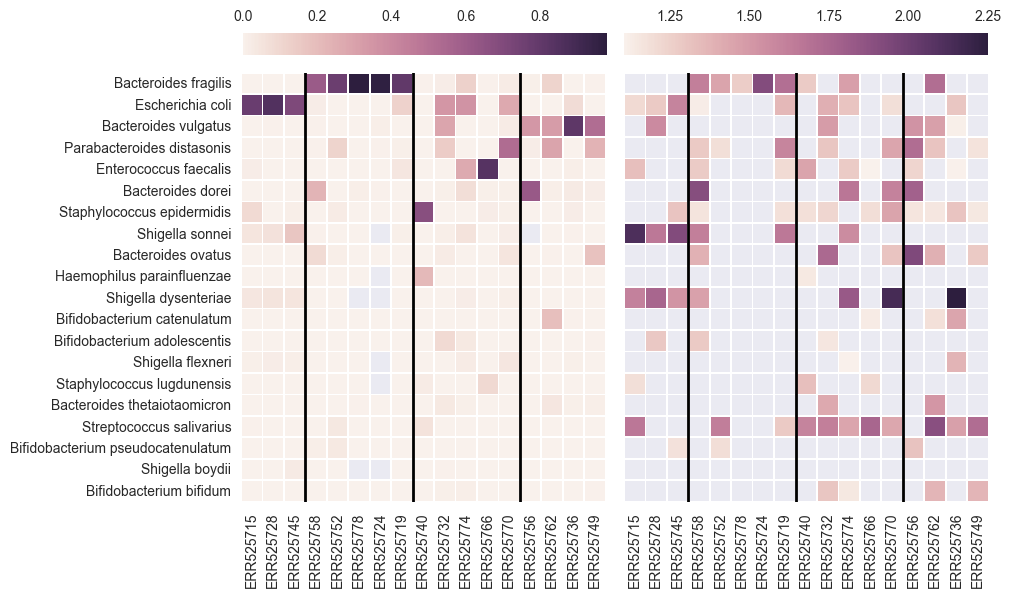

In [258]:
sns.set(style="dark")
# rearrange ptr and ab based on ptr mean values
n=20
#s=ab.transpose().mean().sort_values(ascending=False).index.values#
#ptr2=ptr.reindex(list(s))
#ab2=ab.reindex(list(s))
abs2=ab2.ix[:,list(cluster_sort)]
ptrs2=ptr2.ix[:,list(cluster_sort)]

fig,axn = plt.subplots(1, 2, sharey=True)

#fig, axn = plt.subplots(2, 1, sharex=True,sharey=True)
#cbar_ax = fig.add_axes([.91, .3, .03, .4])

h=[abs2.ix[:n,:],ptrs2.ix[:n,:]]
#h=[abs2,ptrs2]

cmap=[sns.cubehelix_palette(18,light=.95,as_cmap=True),
      sns.cubehelix_palette(18,light=.95,as_cmap=True)]

#x=np.linspace(0,5.5,len(h[0]))
#y=np.linspace(0,100,1001)

for i, ax in enumerate(axn.flat):
    cbar_ax = fig.add_axes([0.315+i*.477, 1, .455, .04])
    
    sns.heatmap(h[i], ax=ax,cbar=True,cbar_kws={'orientation':'horizontal'},
                cbar_ax=cbar_ax,linewidths=.5,square=True,cmap=cmap[i])#,
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    cbar_ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
    cbar_ax.invert_yaxis()
    cbar_ax.xaxis.tick_top()
    
    # cbar
    
    #cbar_ax= fig.add_axes([leftc,bottomc,width_c,height_c])
    #a= ax.pcolor(x,y,h[i], cmap=cmap[i])
    #cbar= fig.colorbar(a, cax=cbar_ax, orientation='horizontal')
    #cbar = fig.colorbar(cbar_ax)#cax=cbar_ax, ticks=[0, 0.5, 1], orientation='horizontal')
    #cbar.ax.set_xticklabels(['Low', 'Medium', 'High'])
    #cbar.set_label(cmap_labels[l], fontsize=tick_label_fontsize, labelpad=25)
    #cbar.ax.tick_params(labelsize=tick_label_fontsize)
    
    for pos in line_pos:
        ax.axvline(pos, 0, 2, linewidth=2, c='k')

#fig.tight_layout()
#fig.tight_layout(rect=[0, 0, 1.5, 1])
fig.tight_layout(rect=[0, 0, 1.27, 1])

#fig.subplots_adjust(left=.5,bottom=.4)

fig.savefig('Figures/heatmap_ab_ptr2.pdf', bbox_inches='tight', pad_inches=0)

In [152]:
import matplotlib.gridspec as gridspec

In [153]:
gs = gridspec.GridSpec(2, 1)

In [246]:
ab2;

In [409]:
ab2.corrwith(ptr2.loc['Escherichia coli'],axis=0,drop=True)

ERR525749   NaN
ERR525770   NaN
ERR525766   NaN
ERR525762   NaN
ERR525732   NaN
ERR525736   NaN
ERR525740   NaN
ERR525756   NaN
ERR525758   NaN
ERR525778   NaN
ERR525724   NaN
ERR525719   NaN
ERR525752   NaN
ERR525774   NaN
ERR525745   NaN
ERR525728   NaN
ERR525715   NaN
dtype: float64

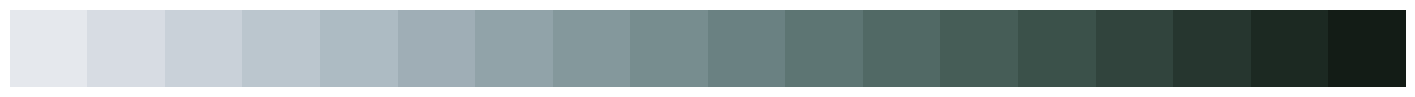

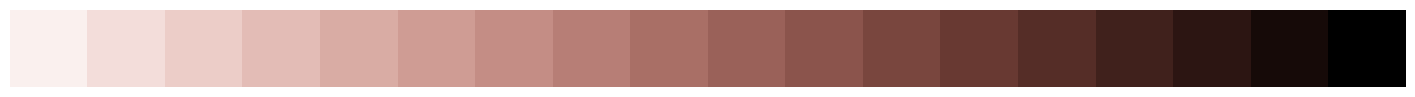

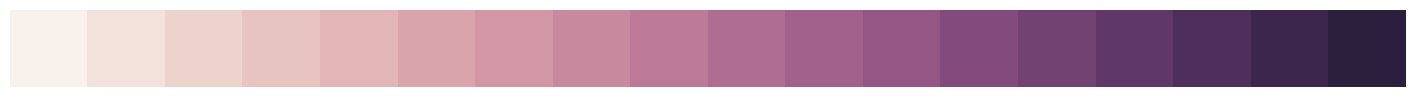

In [225]:
sns.palplot(sns.cubehelix_palette(18, start=2, rot=0.3, dark=.1, light=.91,hue=.3))
sns.palplot(sns.cubehelix_palette(18, start=1, rot=0, dark=0, light=.95))
sns.palplot(sns.cubehelix_palette(18,light=.95))

In [33]:
df1 = ptr.transpose().where((pd.notnull(ptr.transpose())), 0)

/Users/hedani/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:5882: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 10 x 24)
  '(shape is %d x %d)' % inp.shape[::-1])


ValueError: color kwarg must have one color per dataset

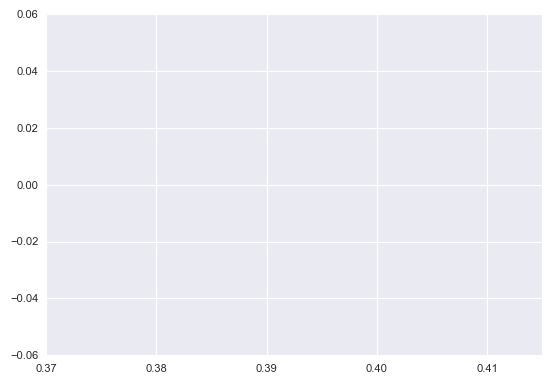

In [34]:
sns.distplot(df1)

## Run a Menace Docker Container

In [1]:
import docker

## Perform tests on artificial metagenomic communities

In [1]:
import menace.lib.Community as Comm
#import docker

In [2]:
#cli = docker.from_env()

In [3]:
#cli = docker.Client(base_url='unix://var/run/docker.sock')
img = 'sysbio-chalmers/menace'
#envs = docker.utils.parse_env_file(join(td,'env_centos'))
envs = ""

In [4]:
acc=['NC_000913.3','NC_007779.1','NC_002655.2','NC_009614.1','NC_017218.1']
growth_param=[[.2, .5, .3, 100],[.2, .5, .3, 100],[.2, .5, .3,100],[0.0001, .8, .2, 100],[.1, .7, .2,100]]
sel=[[0,4]]
td=u'/Users/hedani/Documents/GitRepos/PTRloc/tt_MenaceNB'
accessions=[acc[s] for s in sel[0]]
community_params=[growth_param[s] for s in sel[0]]

In [5]:
c=Comm.Community('comm0',[acc[s] for s in sel[0]],[growth_param[s] for s in sel[0]],td,'bowtie2',img,envs,'hedani@chalmers.se')

AttributeError: 'DockerClient' object has no attribute 'create_container' In Docker SDK for Python 2.0, this method is now on the object APIClient. See the low-level API section of the documentation for more details.

In [11]:
c=Comm.Community('comm0',[acc[s] for s in sel[0]],[growth_param[s] for s in sel[0]],td,'bowtie2',img,envs,'hedani@chalmers.se')
c.build_index()
tot_reads=np.linspace(10**5,10**5,1)
for nr in tot_reads:
    c.sample(nr)
c.write_reads()
c.run_pipeline()
c.collect()

TypeError: create_mount_run() takes exactly 5 arguments (4 given)

In [18]:
create_mount_run('sysbio-chalmers/menace','/Users/Shared/CommTest','basmenace -c /mnt/vol/comm0/project.conf -h','')

"/opt/conda/bin/menace: line 3: __requires__: command not found\n/opt/conda/bin/menace: line 4: import: command not found\n/opt/conda/bin/menace: line 5: import: command not found\n/opt/conda/bin/menace: line 6: from: command not found\n/opt/conda/bin/menace: menace: line 9: syntax error near unexpected token `('\n/opt/conda/bin/menace: menace: line 9: `    sys.argv[0] = re.sub(r'(-script\\.pyw?|\\.exe)?$', '', sys.argv[0])'\n"

In [10]:
import docker
cli = docker.from_env()

In [15]:
cli = docker.APIClient(base_url='unix://var/run/docker.sock')